In [5]:
!pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=177bf0cebc88fee93dca4504aec0ee5d38405e64b4c0d6862d843621db3ed1d4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [6]:
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import fasttext
import matplotlib.pyplot as plt


In [7]:
# # Install the 'fasttext' library
# !pip install fasttext

# Download the pre-trained FastText model (English, 300 dimensions)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

# Unzip the downloaded model file
!gzip -d cc.en.300.bin.gz

--2023-12-16 12:01:06--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 65.8.243.97, 65.8.243.25, 65.8.243.119, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|65.8.243.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   185MB/s    in 48s     

2023-12-16 12:01:54 (90.1 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [8]:
model = fasttext.load_model('/content/cc.en.300.bin')


In [9]:
data=pd.read_csv('Hindustan_Clean.csv')

In [10]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.210280,3.635514,0.971963,1.514019,2.780374
std,2.24135,2.162135,1.893326,1.570817,0.913724,0.912763,1.921802
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,10.000000,9.000000,4.000000,5.000000,11.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x797f7386ed40>,
 'caps': [<matplotlib.lines.Line2D at 0x797f7386e8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x797f737dcf10>],
 'medians': [<matplotlib.lines.Line2D at 0x797f7386f8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x797f7386f550>],
 'means': []}

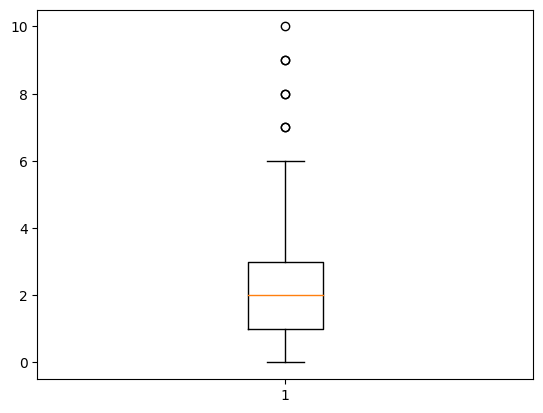

In [11]:
plt.boxplot(data['prop_count'])

In [12]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        def range_(value):
          if (value<lower_limit):
            return lower_limit
          if (value>upper_limit):
            return upper_limit
          else:
            return value

        df[col]=df[col].apply(range_)

    return df

columns_=['prop_count','noun_count','adj_count','verb_count','stop_count']
remove_outliers(data,columns_)

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,6.0,2.0,0.0,0.0,2.0
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.0,7.0,1.0,1.0,3.0
211,5,we approve crispr gene edit to treat sickle ce...,10,0.0,4.0,1.0,3.0,2.0
212,5,sleep deprivation and vertigo here s how lack ...,13,0.0,5.0,1.0,2.0,5.0


In [13]:
data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
0,7,stoke to unleash promising spin duo on india a...,15,3.0,4.0,1.0,1.0,5.0
1,7,more than man ganguly s bonafide remark on wom...,14,1.0,6.0,1.0,1.0,4.0
2,7,rohit s chance to make up for wc gavaskar s bi...,15,4.0,3.0,1.0,1.0,5.0
3,7,watch crowd queue up outside shami s house aft...,13,3.0,5.0,0.0,2.0,2.0
4,7,hafeez slams australia for pakistan s warm up ...,14,5.0,2.0,2.0,1.0,3.0


{'whiskers': [<matplotlib.lines.Line2D at 0x797f734aa500>,
 'caps': [<matplotlib.lines.Line2D at 0x797f734aaa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x797f734aa260>],
 'medians': [<matplotlib.lines.Line2D at 0x797f734aaf80>],
 'fliers': [<matplotlib.lines.Line2D at 0x797f734ab220>],
 'means': []}

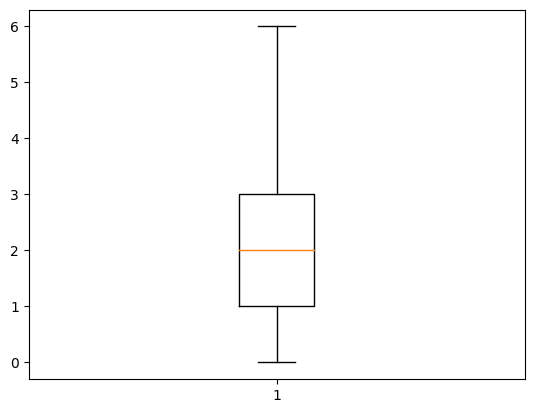

In [14]:
plt.boxplot(data['prop_count'])

In [15]:
data.describe()

,label,word_count,prop_count,noun_count,adj_count,verb_count,stop_count
count,214.00000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,4.28972,11.897196,2.135514,3.630841,0.927570,1.497664,2.768692
std,2.24135,2.162135,1.674260,1.556203,0.808196,0.867376,1.878717
min,1.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,10.000000,1.000000,3.000000,0.000000,1.000000,1.000000
50%,4.00000,12.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,6.00000,13.000000,3.000000,5.000000,1.000000,2.000000,4.000000
max,8.00000,17.000000,6.000000,8.000000,2.500000,3.500000,8.500000


In [16]:
data.columns

Index(['label', 'clean_text', 'word_count', 'prop_count', 'noun_count',
       'adj_count', 'verb_count', 'stop_count'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scalar=StandardScaler()

In [19]:
data['adj_count']=np.log1p(data['adj_count'])
data['prop_count']=np.log1p(data['prop_count'])
data['noun_count']=np.log1p(data['noun_count'])
data['verb_count']=np.log1p(data['verb_count'])
data['stop_count']=np.log1p(data['stop_count'])

In [20]:
def text_to_vector(text, model):
    words = text.split()
    vectors = [model.get_word_vector(word) for word in words]
    if vectors:
        return np.sum(vectors, axis=0)
    else:
        return np.zeros(model.get_dimension())


# Apply the function to the 'text' column and create a new 'vector' column
data['vector'] = data['clean_text'].apply(lambda x: text_to_vector(x, model))

# Display the DataFrame with the added 'vector' column
data

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.47792292, 0.3679434, -0.01982779, 0.661172..."
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.23060992, 0.090274915, -0.6125163, 0.182399..."
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.24070956, -2.2956035, -1.6438901, 0.240252..."
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.10145891, -1.1389625, -0.53418756, 0.62090..."
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.109727144, -1.91525, -0.62985766, 0.332669..."
...,...,...,...,...,...,...,...,...,...
209,5,indonesia s prambanan temple testimony to indi...,13,1.945910,1.098612,0.000000,0.000000,1.098612,"[-0.22725388, -0.5577065, -0.7625804, -0.14669..."
210,5,mooli for weight loss and immunity 7 benefit 7...,14,0.000000,2.079442,0.693147,0.693147,1.386294,"[-0.06971578, 0.27535683, 0.5165997, -0.096259..."
211,5,we approve crispr gene edit to treat sickle ce...,10,0.000000,1.609438,0.693147,1.386294,1.098612,"[0.6735603, 0.2052811, 0.16081484, 0.57829696,..."
212,5,sleep deprivation and vertigo here s how lack ...,13,0.000000,1.791759,0.693147,1.098612,1.791759,"[-0.2391257, -0.23416156, 0.019933961, -0.2224..."


In [21]:
len(data['vector'][0])

300

In [22]:
np.ndim(data.vector)

1

In [23]:
vector_columns = pd.DataFrame(data['vector'].to_list(), columns=[f'FastText{i}' for i in range(1,301)])
new_data= pd.concat([data, vector_columns], axis=1)

In [24]:
new_data.head()

,label,clean_text,word_count,prop_count,noun_count,adj_count,verb_count,stop_count,vector,FastText1,...,FastText291,FastText292,FastText293,FastText294,FastText295,FastText296,FastText297,FastText298,FastText299,FastText300
0,7,stoke to unleash promising spin duo on india a...,15,1.386294,1.609438,0.693147,0.693147,1.791759,"[-0.47792292, 0.3679434, -0.01982779, 0.661172...",-0.477923,...,0.689456,0.031634,-1.627211,-0.937937,-0.024266,0.459146,0.213932,2.995081,-0.655852,-0.405132
1,7,more than man ganguly s bonafide remark on wom...,14,0.693147,1.945910,0.693147,0.693147,1.609438,"[0.23060992, 0.090274915, -0.6125163, 0.182399...",0.230610,...,0.641851,-0.176622,-2.058187,0.012669,-0.206624,0.283251,-0.077892,0.540130,0.108655,0.235534
2,7,rohit s chance to make up for wc gavaskar s bi...,15,1.609438,1.386294,0.693147,0.693147,1.791759,"[-0.24070956, -2.2956035, -1.6438901, 0.240252...",-0.240710,...,1.653543,0.246639,-3.505176,1.401851,-0.251931,-0.287548,0.413463,2.049032,-0.195404,0.253811
3,7,watch crowd queue up outside shami s house aft...,13,1.386294,1.791759,0.000000,1.098612,1.098612,"[-0.10145891, -1.1389625, -0.53418756, 0.62090...",-0.101459,...,0.615779,-0.119216,-1.290754,0.580443,-0.277330,0.457348,0.074324,1.006223,-0.019696,-0.313907
4,7,hafeez slams australia for pakistan s warm up ...,14,1.791759,1.098612,1.098612,0.693147,1.386294,"[-0.109727144, -1.91525, -0.62985766, 0.332669...",-0.109727,...,0.942597,-0.107987,-2.571244,0.406074,-0.284688,-0.038991,-0.260593,1.337829,0.184378,-0.171526


In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Columns: 309 entries, label to FastText300
dtypes: float32(300), float64(5), int64(2), object(2)
memory usage: 266.0+ KB


In [27]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [28]:
X=new_data.drop(['label','word_count','vector','clean_text'],axis=1)

In [29]:
Y=new_data['label']
Y.value_counts()

1    29
2    29
3    29
4    28
5    28
7    26
6    25
8    20
Name: label, dtype: int64

In [35]:
X

,prop_count,noun_count,adj_count,verb_count,stop_count,FastText1,FastText2,FastText3,FastText4,FastText5,...,FastText291,FastText292,FastText293,FastText294,FastText295,FastText296,FastText297,FastText298,FastText299,FastText300
0,1.386294,1.609438,0.693147,0.693147,1.791759,-0.477923,0.367943,-0.019828,0.661173,-0.428750,...,0.689456,0.031634,-1.627211,-0.937937,-0.024266,0.459146,0.213932,2.995081,-0.655852,-0.405132
1,0.693147,1.945910,0.693147,0.693147,1.609438,0.230610,0.090275,-0.612516,0.182399,0.253619,...,0.641851,-0.176622,-2.058187,0.012669,-0.206624,0.283251,-0.077892,0.540130,0.108655,0.235534
2,1.609438,1.386294,0.693147,0.693147,1.791759,-0.240710,-2.295604,-1.643890,0.240252,-0.070705,...,1.653543,0.246639,-3.505176,1.401851,-0.251931,-0.287548,0.413463,2.049032,-0.195404,0.253811
3,1.386294,1.791759,0.000000,1.098612,1.098612,-0.101459,-1.138963,-0.534188,0.620901,-0.285769,...,0.615779,-0.119216,-1.290754,0.580443,-0.277330,0.457348,0.074324,1.006223,-0.019696,-0.313907
4,1.791759,1.098612,1.098612,0.693147,1.386294,-0.109727,-1.915250,-0.629858,0.332670,-0.029810,...,0.942597,-0.107987,-2.571244,0.406074,-0.284688,-0.038991,-0.260593,1.337829,0.184378,-0.171526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1.945910,1.098612,0.000000,0.000000,1.098612,-0.227254,-0.557706,-0.762580,-0.146690,0.301466,...,0.997658,-0.047888,-2.330998,0.982470,-0.044644,0.133469,-0.213498,0.622068,0.249815,0.394779
210,0.000000,2.079442,0.693147,0.693147,1.386294,-0.069716,0.275357,0.516600,-0.096259,0.204710,...,0.234657,0.362958,-1.607436,-0.771498,0.253561,-0.178444,0.055268,4.532596,-0.077551,-0.537746
211,0.000000,1.609438,0.693147,1.386294,1.098612,0.673560,0.205281,0.160815,0.578297,-0.192513,...,0.723765,0.448888,-1.164384,0.109464,-0.304706,0.424245,0.074222,1.585895,0.247027,0.338788
212,0.000000,1.791759,0.693147,1.098612,1.791759,-0.239126,-0.234162,0.019934,-0.222426,-0.177059,...,0.553757,0.157667,-1.392475,0.269451,-0.636439,-0.145619,-0.040876,0.658635,-0.043951,-0.014626


In [37]:
np.random.shuffle(X['prop_count'])

<ipython-input-37-7fbb222958f9>:1: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X['prop_count'])
<ipython-input-37-7fbb222958f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  np.random.shuffle(X['prop_count'])


In [30]:
x_train_full,x_test,y_train_full,y_test=train_test_split(X , Y , test_size=0.1, random _state=42)

This is Not The Best Practice But Because Of Small Dataset I want Increase The Training Size Of The Model

In [31]:
# x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full ,test_size=0.1,random_state=42)
x_test_,x_valid,y_test_,y_valid=train_test_split(x_test,y_test ,test_size=0.5,random_state=42)

In [32]:
scalar.fit(x_train_full)
x_train_full=scalar.transform(x_train_full)
x_test=scalar.transform(x_test)
x_valid=scalar.transform(x_valid)



In [33]:
x_train_full.shape,x_test.shape,y_train_full.shape,y_test.shape

((192, 305), (22, 305), (192,), (22,))

In [39]:
# x_test.shape,x_valid.shape,y_test.shape,y_valid.shape

In [40]:
x_test_.shape,x_valid.shape,y_test_.shape,y_valid.shape

((11, 305), (11, 305), (11,), (11,))

In [41]:
type(x_train_full)

numpy.ndarray

In [42]:
x_train_full.shape[1]

305

In [53]:
from keras import regularizers

In [211]:
model = keras.Sequential()
model.add(keras.layers.Dense(32,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(x_train_full.shape[1],)))
model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(9, activation='softmax'))

In [212]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 32)                9792      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_50 (Dense)            (None, 32)                1056      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_51 (Dense)            (None, 9)                 297       
                                                                 
Total params: 11145 (43.54 KB)
Trainable params: 11145 (43.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [213]:
from keras import optimizers

In [214]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [215]:
history=model.fit(x_train_full,y_train_full,epochs=50, validation_data=(x_valid, y_valid))


Epoch 1/50
6/6 [==============================] - 1s 44ms/step - loss: 3.0500 - accuracy: 0.1354 - val_loss: 2.5658 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 2.7211 - accuracy: 0.1406 - val_loss: 2.4094 - val_accuracy: 0.1818
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 2.6534 - accuracy: 0.1198 - val_loss: 2.2933 - val_accuracy: 0.1818
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 2.5050 - accuracy: 0.1875 - val_loss: 2.2167 - val_accuracy: 0.3636
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 2.2807 - accuracy: 0.2188 - val_loss: 2.1645 - val_accuracy: 0.3636
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 2.1863 - accuracy: 0.2812 - val_loss: 2.1135 - val_accuracy: 0.3636
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 2.1826 - accuracy: 0.2396 - val_loss: 2.0675 - val_accuracy: 0.4545
Epoch 8/50
6/6 [============

In [221]:
model.evaluate(x_test_, y_test_)


1/1 [==============================] - 0s 30ms/step - loss: 1.5535 - accuracy: 0.8182


[1.5534629821777344, 0.8181818127632141]

In [222]:
model.evaluate(x_train_full,y_train_full)

6/6 [==============================] - 0s 3ms/step - loss: 0.5402 - accuracy: 0.9844


[0.5402005314826965, 0.984375]

In [223]:
his=history.history

In [224]:
his.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

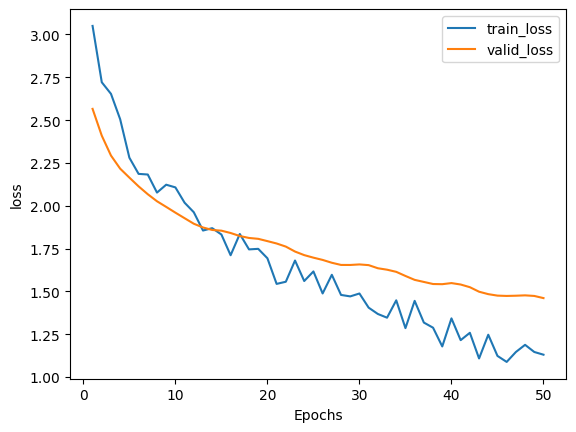

In [227]:
train_loss=his['loss']
valid_loss=his['val_loss']
import matplotlib.pyplot as plt
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,valid_loss,label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

By Using the above step we are able to avoid overfitting model

In [228]:
pred=model.predict(x_test_)

1/1 [==============================] - 0s 21ms/step


In [229]:
pred_labels = np.argmax(pred, axis=1)

In [230]:
len(pred_labels)

11

In [231]:
len(y_test_)

11

In [232]:
#labels -- {'world':1,'mumbai':2,'Entertainment':3,'india':4,'Lifestyle':5,'cricket':7,'Astrology':6,'Education':8}


In [233]:
pred_labels

array([1, 8, 5, 6, 2, 1, 4, 3, 3, 3, 7])

In [234]:
y_test_

141    2
45     8
190    5
66     6
144    2
209    5
86     4
182    3
178    3
184    3
15     7
Name: label, dtype: int64

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [236]:
report=classification_report(y_test_,pred_labels)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.88      0.75      0.79        11
weighted avg       1.00      0.82      0.88        11



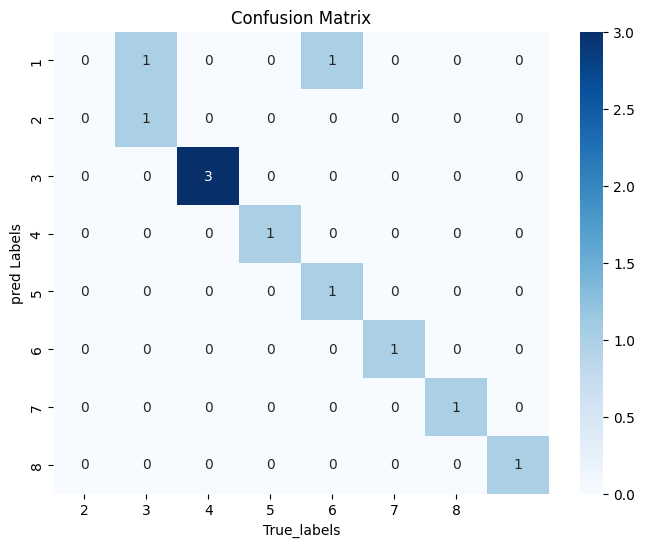

In [238]:
conf_matrix = confusion_matrix(pred_labels,y_test_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_), yticklabels=np.unique(pred_labels))
plt.xlabel('True_labels')
plt.ylabel('pred Labels')
plt.title('Confusion Matrix')
plt.show()

Becuase Of low of data we have less amount of test data

Not Got Best Results Because The Size Of The Data and 8 Classes Among Them That Is Model Trying To Overfit The Data We Getting Good Accuracy On Train Data But Comparatively Not On The Test Data


By Considering The Size Of The Dataset And Classes To Classify It Is Doing Good Job
